In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [49]:
dt = pd.read_csv("dz14w.data.csv")

# Считаем DataFrame и начнем его исследовать 

In [50]:
dt.head(5)

,b,30.83,0,u,g,w,v,1.25,t,t.1,01,f,g.1,00202,0.1,+
0,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
1,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
2,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
3,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
4,b,32.08,4.000,u,g,m,v,2.50,t,f,0,t,g,00360,0,+


In [154]:
dt.groupby("+").head(5)

,b,30.83,0,u,g,w,v,1.25,t,t.1,01,f,g.1,00202,0.1,+
0,a,58.67,4.460,u,g,q,h,3.040,t,t,6,f,g,00043,560,+
1,a,24.50,0.500,u,g,q,h,1.500,t,f,0,f,g,00280,824,+
2,b,27.83,1.540,u,g,w,v,3.750,t,t,5,t,g,00100,3,+
3,b,20.17,5.625,u,g,w,v,1.710,t,f,0,f,s,00120,0,+
4,b,32.08,4.000,u,g,m,v,2.500,t,f,0,t,g,00360,0,+
69,b,32.33,7.500,u,g,e,bb,1.585,t,f,0,t,s,00420,0,-
70,b,34.83,4.000,u,g,d,bb,12.500,t,f,0,t,g,1,0,-
71,a,38.58,5.000,u,g,cc,v,13.500,t,f,0,t,g,00980,0,-
72,b,44.25,0.500,u,g,m,v,10.750,t,f,0,f,s,00400,0,-
73,b,44.83,7.000,y,p,c,v,1.625,f,f,0,f,g,00160,2,-


In [6]:
dt['+'].unique() 

array(['+', '-'], dtype=object)

### В базе есть пустые данные самое удобное чем их можно заменить так это медианой стобца а ,cтолбец  [+] будем угадывать 

In [48]:
mn = (dt['00202'] != '?').mean()
#dt['00202'].fillna(value =mn )
dt =  dt.replace(to_replace ='[?]', value = mn , regex = True)

0      00043
1      00280
2      00100
3      00120
4      00360
       ...  
684    00260
685    00200
686    00200
687    00280
688    00000
Name: 00202, Length: 689, dtype: object

In [51]:
dt[(dt['00202'] == '?')].head(5)

,b,30.83,0,u,g,w,v,1.25,t,t.1,01,f,g.1,00202,0.1,+


In [56]:
pd.get_dummies(dt["+"]).head(3)

0    1
1    1
2    1
Name: +, dtype: uint8

In [111]:
y = pd.Series((pd.get_dummies(dt["+"]))["+"])

### Начнем разделение сета на X и y не забывая о том что большая часть данных представлена в виде строк

In [91]:
X = dt.drop(["b" ,'u' ,'g' , 'w' , "+" , 'v' , 'f' , 't.1' , 't' ,'g.1',], axis=1)
X.head(3)

,30.83,0,1.25,01,00202,0.1
0,58.67,4.46,3.04,6,00043,560
1,24.50,0.50,1.50,0,00280,824
2,27.83,1.54,3.75,5,00100,3


In [108]:
pd_2 = pd.get_dummies(dt.drop(["30.83" ,"0" ,"1.25" ,'01' ,"00202" ,"0.1", "+"] , axis =1))
X = X.merge(pd_2, left_index=True, right_index=True)

In [109]:
X.head(5)

,30.83,0,1.25,01,00202,0.1,b_1.0,b_a,b_b,u_1.0,...,v_z,t_f,t_t,t.1_f,t.1_t,f_f,f_t,g.1_g,g.1_p,g.1_s
0,58.67,4.460,3.04,6,00043,560,0,1,0,0,...,0,0,1,0,1,1,0,1,0,0
1,24.50,0.500,1.50,0,00280,824,0,1,0,0,...,0,0,1,1,0,1,0,1,0,0
2,27.83,1.540,3.75,5,00100,3,0,0,1,0,...,0,0,1,0,1,0,1,1,0,0
3,20.17,5.625,1.71,0,00120,0,0,0,1,0,...,0,0,1,1,0,1,0,0,0,1
4,32.08,4.000,2.50,0,00360,0,0,0,1,0,...,0,0,1,1,0,0,1,1,0,0


###  После того как выборки были созданны постараемся подобрать наилучший вид дерева при помоши
### GridSearchCV  

In [112]:
from sklearn.model_selection import train_test_split
X_test , X_train , y_test , y_train = train_test_split(X,y ,test_size = 0.33 , random_state =42)

In [135]:
from sklearn.model_selection import GridSearchCV # Автоподбор парметров дерева
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
parametrs = {'criterion':['entropy' , 'gini'], "max_depth" :range(1,10) , "min_samples_split" : range(2,10) , "min_samples_leaf": range(1,10)}

grid_search = GridSearchCV(clf , parametrs, cv=5)

In [136]:
grid_search.fit(X_train,y_train)
clf = grid_search.best_estimator_

In [137]:
clf.score(X_test,y_test)

0.8590021691973969

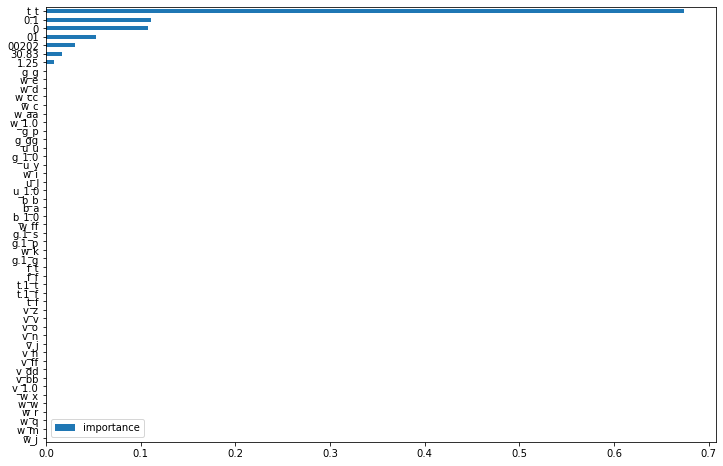

In [140]:
imp = pd.DataFrame(clf.feature_importances_, index=X.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))

### На этом графике видно что большая часть данных попросту не участвует в классификаторе
### По этому изменим X и заного обучим дерево

In [153]:
X = X[['t_t' , '0.1', '0' ,'01', '00202' ,"30.83"]] # оставим все самое лучшее

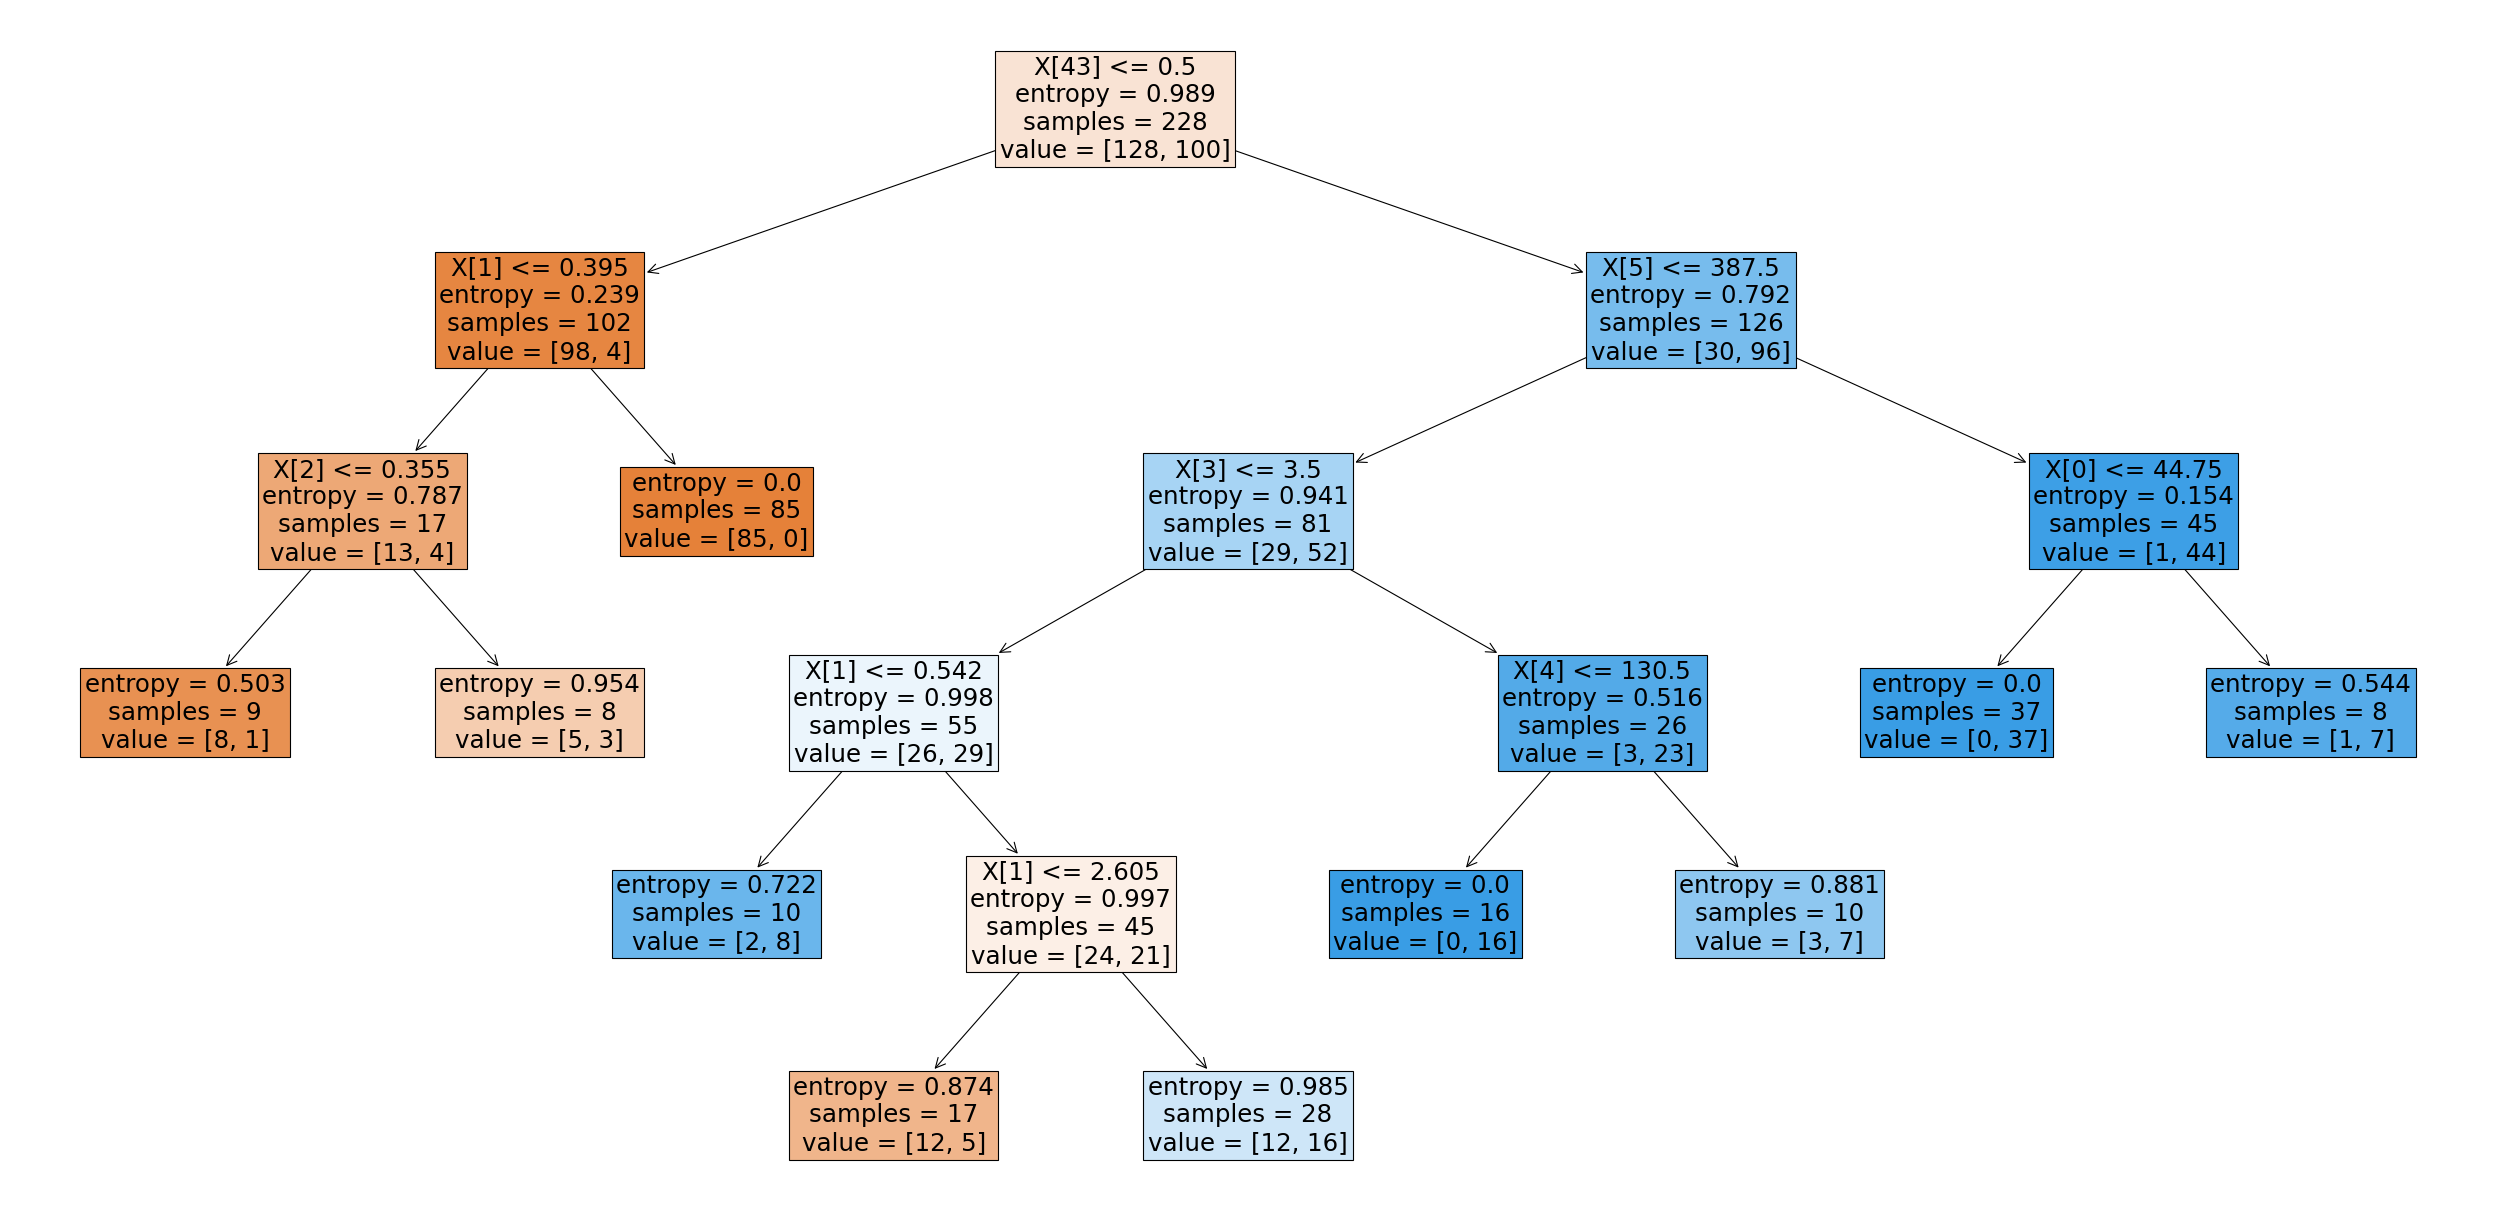

In [142]:
from sklearn import tree
%matplotlib inline
style = "<style>svg{width: 70% !important; height: 60% !important;} </style>"

plt.figure(figsize=(40, 20),dpi=80)
p = tree.plot_tree(clf, filled=True ,fontsize=22)

In [157]:
from sklearn.model_selection import train_test_split
X_test , X_train , y_test , y_train = train_test_split(X,y ,test_size = 0.33 , random_state =42)

clf = DecisionTreeClassifier()
parametrs = {'criterion':['entropy' , 'gini'], "max_depth" :range(1,10) , "min_samples_split" : range(2,10) , "min_samples_leaf": range(1,10)}

grid_search = GridSearchCV(clf , parametrs, cv=5)

In [158]:
grid_search.fit(X_train,y_train)
clf = grid_search.best_estimator_

### Данных стало на порядок меньше а точность не упала 

In [159]:
clf.score(X_test,y_test)

0.8590021691973969

In [161]:
from sklearn.metrics import confusion_matrix

y_predicted = clf.predict(X_test)
cm = confusion_matrix(y_test , y_predicted)
print(cm)

[[226  29]
 [ 36 170]]


### Для галочки постоим confusion matrix

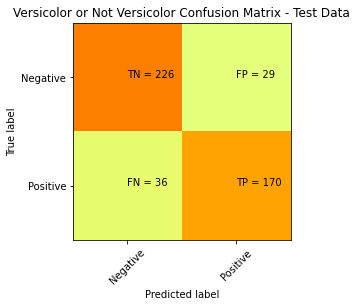

In [162]:
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Versicolor or Not Versicolor Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

### В результате лучшая точность 86% ,a  благодоря визаулизации обученой модели мы смогли избавиться от данных не участвуюших в выборке